# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__  __5.0__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

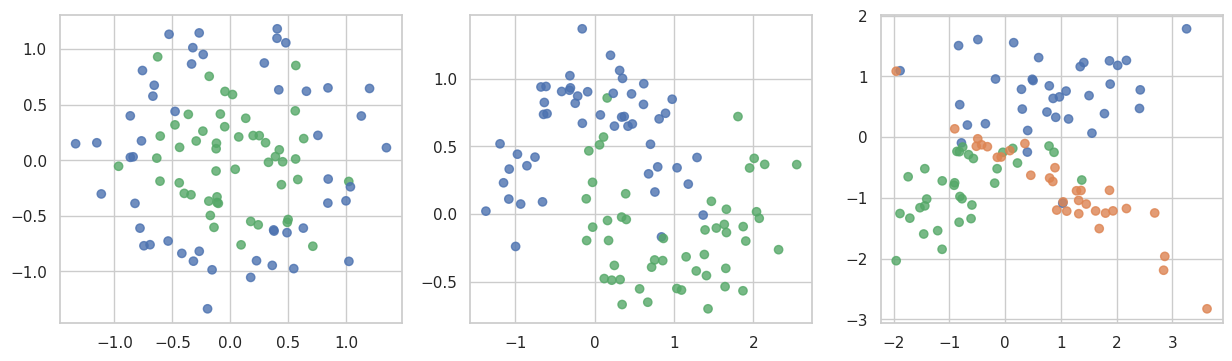

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

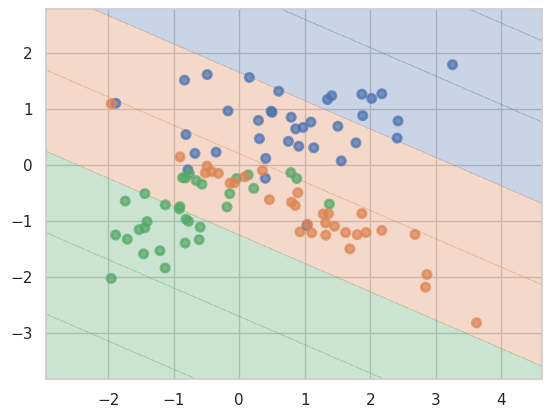

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.metrics import accuracy_score

# Обучим дерево и нарисуем плоскость
def fit_plot_decision_tree(X, y, random_state=42):
    # разделение на train и test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Train the Decision Tree
    clf = DecisionTreeClassifier(random_state=random_state)
    clf.fit(X_train, y_train)

    # выведем плоскость
    plt.figure(figsize=(4, 3))
    plot_surface(clf, X, y)

    # Расчитаем и выведем accuracy scores
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # Проверка на переобучение
    if train_accuracy > test_accuracy:
        print("The model may be overfitting to the training set.")
    else:
        print("The model is not overfitting to the training set.")

Training Accuracy: 1.00
Test Accuracy: 0.73
The model may be overfitting to the training set.


<Figure size 400x300 with 0 Axes>

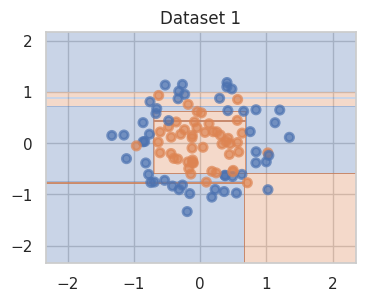

Training Accuracy: 1.00
Test Accuracy: 0.87
The model may be overfitting to the training set.


<Figure size 400x300 with 0 Axes>

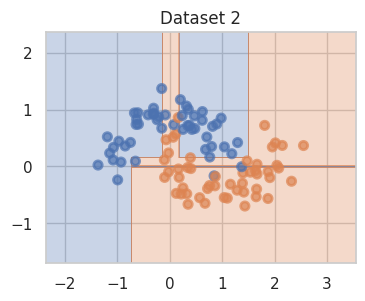

Training Accuracy: 1.00
Test Accuracy: 0.83
The model may be overfitting to the training set.


<Figure size 400x300 with 0 Axes>

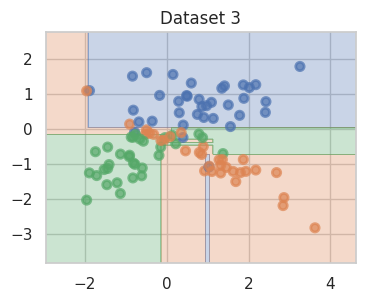

In [9]:
for i, (X, y) in enumerate(datasets):
    plt.figure(figsize=(4, 3))
    fit_plot_decision_tree(X, y)
    plt.title(f"Dataset {i+1}")
    plt.show()

__Ответ:__

Поскольку Accuracy на обучающей выборке во всех датасетах у нас- равняется 1, а Аccuracy на тестовой выборке - меньше, отсюда делаем вывод, что все три модели переобучены.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

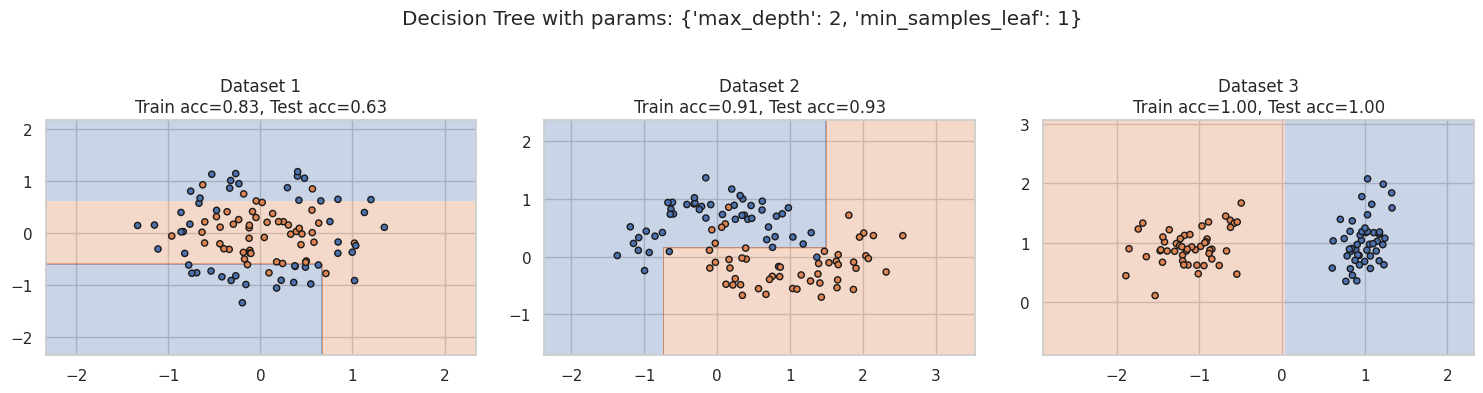

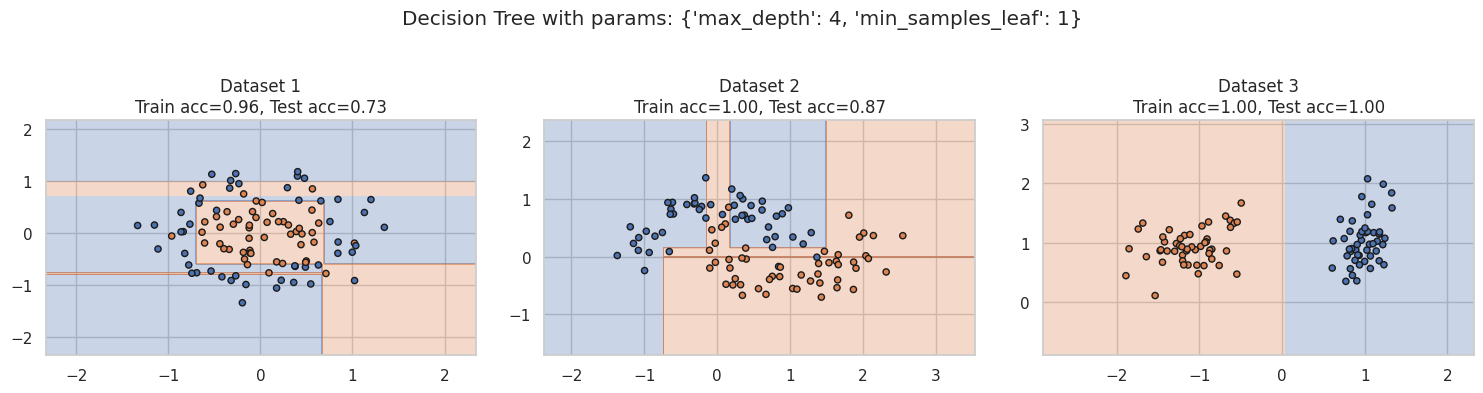

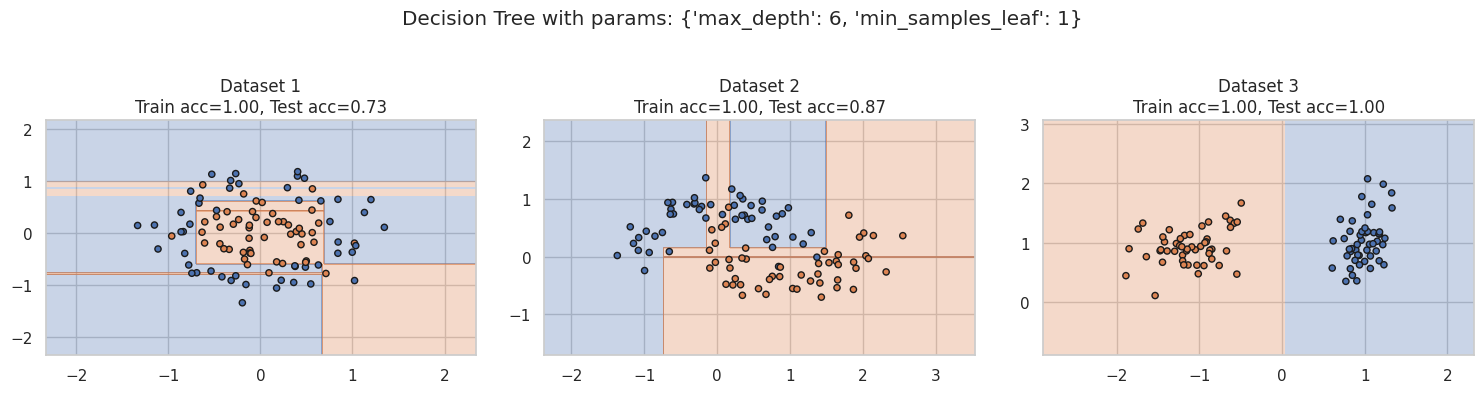

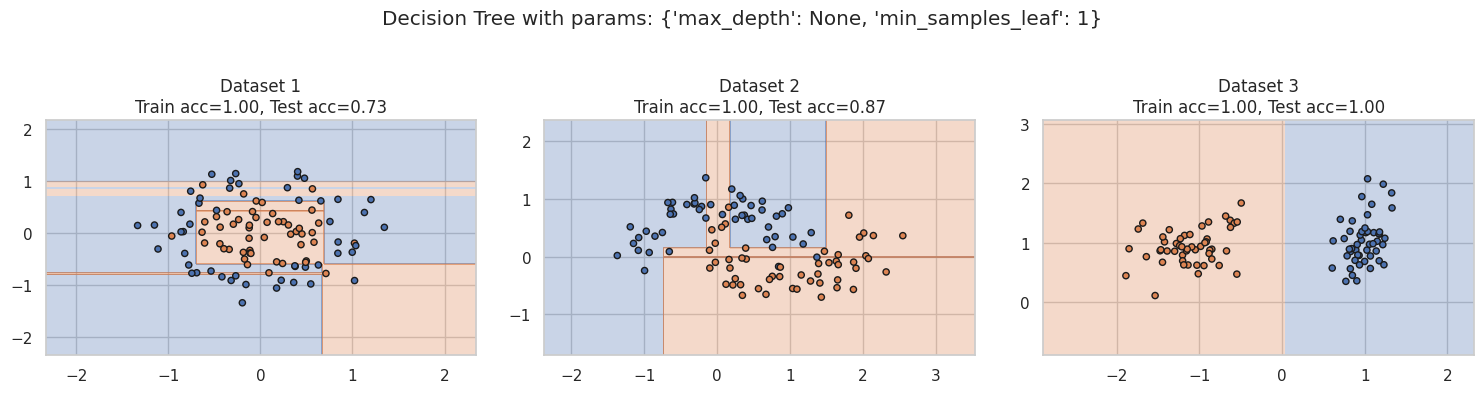

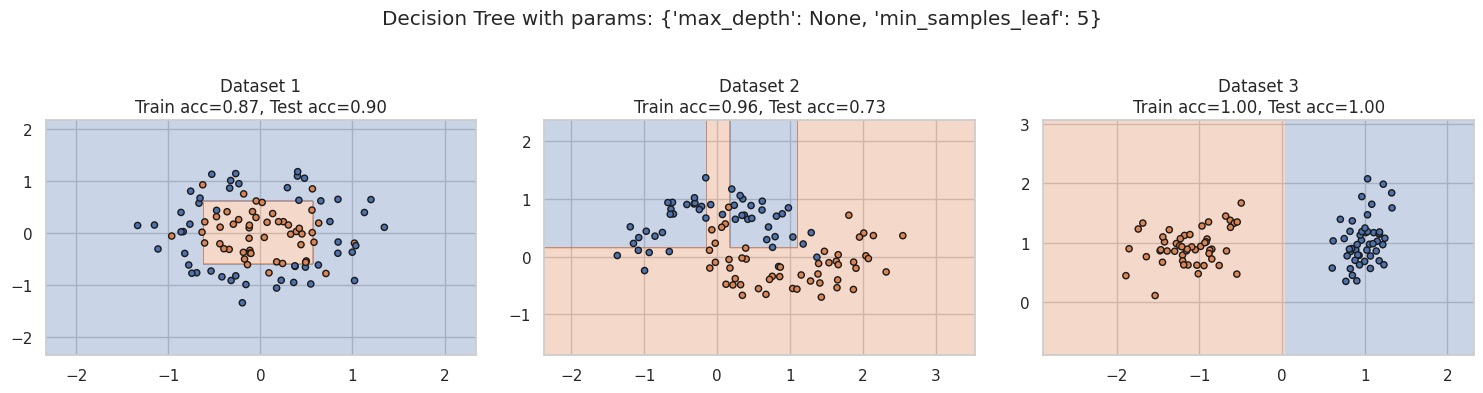

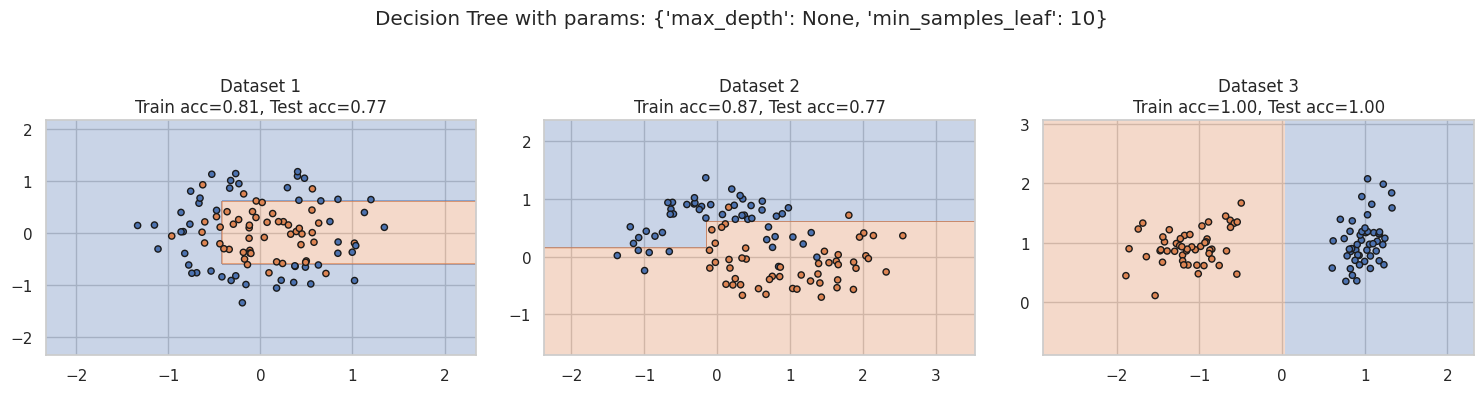

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set(style='whitegrid')

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)

# Создание датасетов
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_features=2, n_redundant=0, n_informative=2,
                        random_state=1, n_clusters_per_class=1)
]

# Параметры для перебора
parameters = [
    {'max_depth': 2, 'min_samples_leaf': 1},
    {'max_depth': 4, 'min_samples_leaf': 1},
    {'max_depth': 6, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 5},
    {'max_depth': None, 'min_samples_leaf': 10},
]

# Пройтись по всем наборам параметров и датасетам
for params in parameters:
    plt.figure(figsize=(15, 4))
    for i, (X, y) in enumerate(datasets):
        # Разделение на тренировочную и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        # Создание и обучение модели
        clf = DecisionTreeClassifier(random_state=42, **params)
        clf.fit(X_train, y_train)

        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))

        # Подграфик для текущего датасета
        plt.subplot(1, len(datasets), i + 1)
        plot_surface(clf, X, y)  # Визуализация

        plt.title(f"Dataset {i+1}\nTrain acc={train_accuracy:.2f}, Test acc={test_accuracy:.2f}")

    # Подпись для группы подграфиков с текущими параметрами
    plt.suptitle(f"Decision Tree with params: {params}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the padding between and around subplots.
    plt.show()

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/gdrive')
os.chdir("/gdrive/MyDrive/1.1_Машинное_обучение/homework-practice-05-trees/")
df = pd.read_csv('students.csv')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [12]:
# Код для загрузки модулей
%load_ext autoreload
%autoreload 2
import hw5code

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.2 KB


In [14]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [15]:
# Загрузить датасет
df = pd.read_csv('students.csv', sep=',')

# Переименовать колонки если нужно
df.rename(columns={' UNS': 'UNS'}, inplace=True)

# Показать первые 5 строк DataFrame для предварительного просмотра
df.head()

# Определить колонки с признаками и целевую переменную
feat_col = df.columns[:-1]
targ_col = 'UNS'

# Провести расчет через функцию из hw5code.py
thres_lst = []
gini_lst = []
for col in feat_col:
    thresholds, ginis, threshold_best, gini_best = hw5code.find_best_split(np.array(df[col]), np.array(df[targ_col]))
    thres_lst.append(thresholds)
    gini_lst.append(ginis)

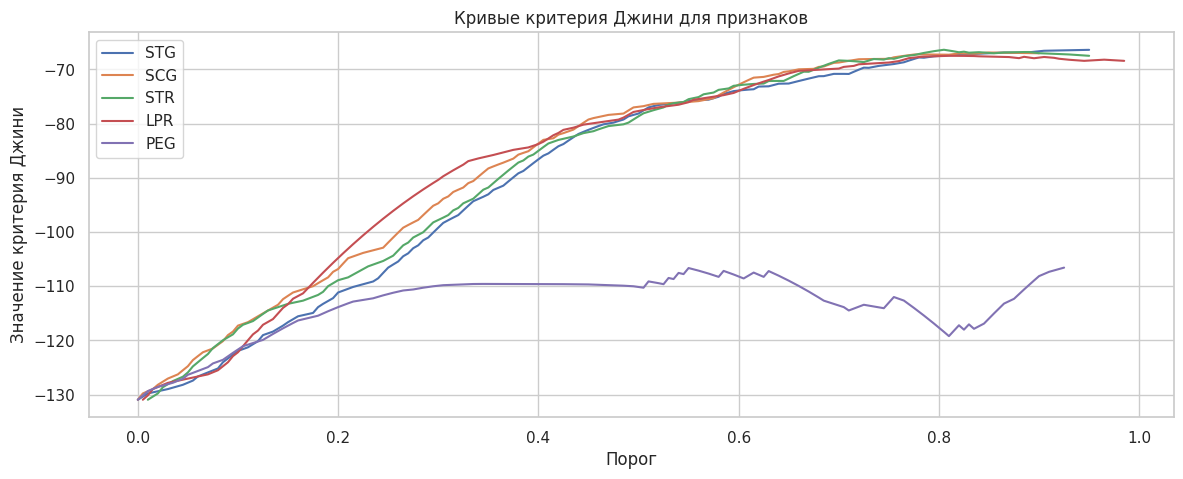

In [16]:
import matplotlib.pyplot as plt

# Вычисляем критерий Джини для каждого признака
fig, ax = plt.subplots(figsize=(14, 5))

for feature in df.columns[:-1]: # Исключаем целевую переменную
    thresholds, ginis, threshold_best, gini_best = hw5code.find_best_split(df[feature].values, df['UNS'].values)
    ax.plot(thresholds, ginis, label=feature)

# Построение кривой "порог — значение критерия Джини"
ax.set_title('Кривые критерия Джини для признаков')
ax.set_xlabel('Порог')
ax.set_ylabel('Значение критерия Джини')
ax.legend()

plt.show()

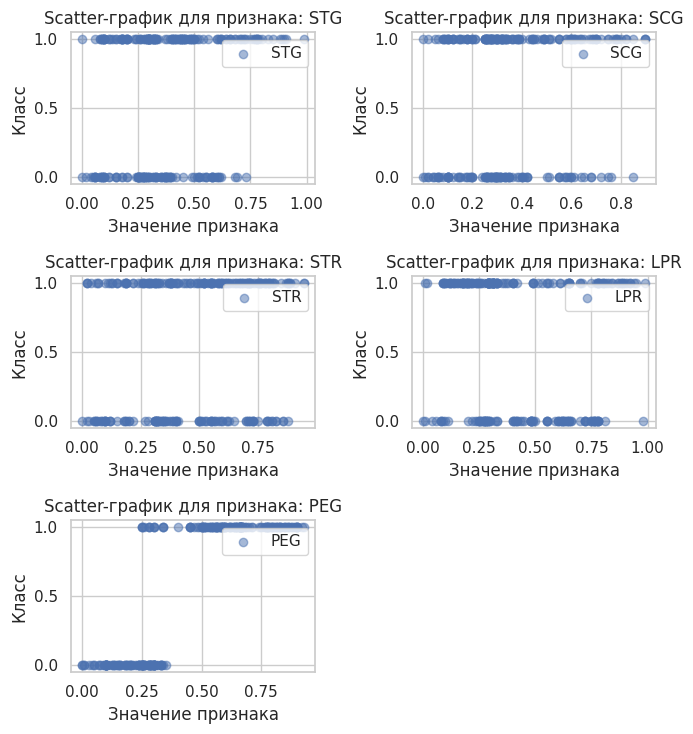

In [17]:
import matplotlib.pyplot as plt

# Количество признаков
num_features = len(df.columns) - 1

# Количество строк и столбцов для сетки графиков
num_rows = num_features // 2 if num_features % 2 == 0 else (num_features // 2) + 1
num_cols = 2

# Создание фигуры и массива осей для подграфиков с уменьшенным размером
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7, num_rows * 2.5))

# Убедимся, что axs - двумерный массив
if num_features % 2 == 1 and num_rows > 1:
    axs = axs.reshape(num_rows, num_cols)

# Итерация по всем признакам и создание scatter-графика для каждого
for i, feature in enumerate(df.columns[:-1]):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]  # Получение текущего оси
    ax.scatter(df[feature], df['UNS'], label=feature, alpha=0.5)
    ax.set_title('Scatter-график для признака: {}'.format(feature))
    ax.set_xlabel('Значение признака')
    ax.set_ylabel('Класс')
    ax.legend()

# Прячем неиспользуемые оси при нечетном числе признаков
if num_features % 2 == 1:
    if num_rows > 1:
        axs[-1, -1].axis('off')
    else:
        axs[-1].axis('off')

# Регулирование макета и отображение графика
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
По характеру кривых можно выделить только признак PEG как подходящего кандидата для разделения, так как он дает минимальное значение критерия Джинни. И по точкам на scatterplot именно у признака PEG также видно явный переход признака из одного класса в другой.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
mushrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)
tic_tac = pd.read_csv('tic-tac-toe-endgame.csv')
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

In [19]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [21]:
import sys

# Установка нового лимита рекурсии
sys.setrecursionlimit(10000)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load Mushroom dataset
data = mushrooms


label_encoders = []
for column in range(data.shape[1]):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders.append(le)

# Split the dataset into train and test sets
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X_train.shape[1]

tree = hw5code.DecisionTree(feature_types)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

RecursionError: ignored

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

feature_types = ['categorical'] * X_train.shape[1]

# Подготовка набора данных
# X_train, X_test, y_train, y_test - это данные, разделенные на обучающую и тестовую выборку

# Зависимость качества от max_depth
depths = range(1, 11)  # Примерный диапазон глубины
accuracies = []
for depth in depths:
    tree = hw5code.DecisionTree(feature_types, max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(depths, accuracies)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max depth for tic-tac-toe dataset')
plt.show()

# Аналогичные циклы можно написать для min_samples_split и min_samples_leaf.
# Не забудьте импортировать необходимые модули и функции, если они еще не были импортированы.

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: